<a href="https://colab.research.google.com/github/issourav/Car_Rental_Portal/blob/master/Stock_Market_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 0: Import Libraries

In [ ]:
!sudo easy_install pip

Searching for pip
Best match: pip 19.3.1
Adding pip 19.3.1 to easy-install.pth file
Installing pip script to /usr/local/bin
Installing pip3.7 script to /usr/local/bin
Installing pip3 script to /usr/local/bin

Using /usr/local/lib/python2.7/dist-packages
Processing dependencies for pip
Finished processing dependencies for pip


In [ ]:
#For Data Processing
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [ ]:
#For **Visualisation**
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# For reading stock data from yahoo
from pandas_datareader import DataReader

In [ ]:
# For *division*
from __future__ import division

In [ ]:
# For Time series 
from datetime import datetime

# Section 1



In [ ]:
#list of companies for stock analysis
companies_list = ['FB','AMZN','AAPL','NFLX','GOOG']
#end date for stock analsis
end = datetime.now()
#start date for stock analysis
start = datetime(end.year-1,end.month,end.day)

In [ ]:
#Getting data from Yahoo finance
#Set Dataframe for each stock in companies_list
for stock in companies_list:
  globals()[stock] = DataReader(stock,'yahoo',start,end)

In [ ]:
#Let's see GOOG stock
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-06-28,1081.000000,1073.369995,1076.390015,1080.910034,1693200,1080.910034
2019-07-01,1107.579956,1093.703003,1098.000000,1097.949951,1436300,1097.949951
2019-07-02,1111.770020,1098.170044,1102.239990,1111.250000,991600,1111.250000
2019-07-03,1126.760010,1113.859985,1117.410034,1121.579956,767000,1121.579956
2019-07-05,1132.880005,1116.140015,1117.800049,1131.589966,1264300,1131.589966


In [ ]:
#Summary for GOOG stock
GOOG.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,1305.246745,1278.376534,1290.951356,1292.701845,1.693767e+06,1292.701845
std,115.419518,117.358422,116.687665,116.094254,7.931502e+05,116.094254
min,1071.319946,1013.536011,1056.510010,1056.619995,3.475000e+05,1056.619995
25%,1209.587494,1188.744965,1197.889984,1203.885040,1.197225e+06,1203.885040
50%,1297.305542,1271.885010,1282.209961,1290.684998,1.470900e+06,1290.684998
75%,1410.217529,1374.947510,1389.884979,1388.614960,1.862100e+06,1388.614960
max,1532.105957,1521.400024,1525.069946,1526.689941,4.805800e+06,1526.689941


In [ ]:
#Info about GOOG stock
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2019-06-28 to 2020-06-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       252 non-null    float64
 1   Low        252 non-null    float64
 2   Open       252 non-null    float64
 3   Close      252 non-null    float64
 4   Volume     252 non-null    int64  
 5   Adj Close  252 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


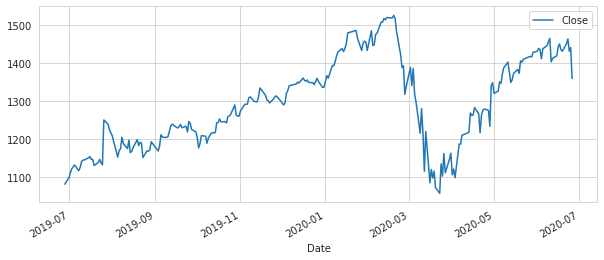

In [ ]:
#Let's see Closing price of GOOG stock for past year
GOOG['Close'].plot(legend=True,figsize=(10,4))

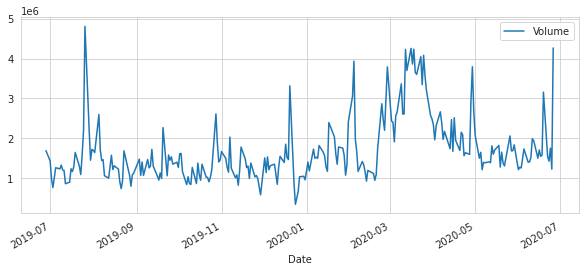

In [ ]:
#Let's see Volume of Stocks traded fro GOOG in past year
GOOG['Volume'].plot(legend=True,figsize=(10,4))

Let's calculate Moving Average [(SMA and EMA)](https://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp)

In [ ]:
MA_day = [10,20,50,100]
for days in MA_day:
  col_name = 'SMA for %s days'%days
  #print(col_name)
  GOOG[col_name] = GOOG['Close'].rolling(window=days).mean()

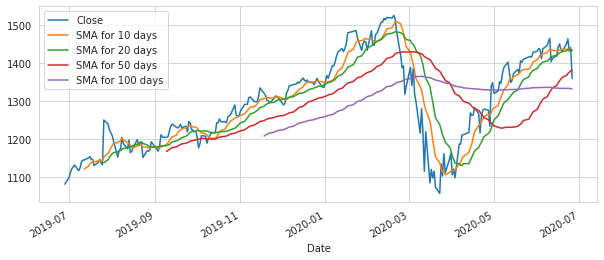

In [ ]:
#Let's plot all the SMA for GOOG stock
GOOG[['Close','SMA for 10 days', 'SMA for 20 days', 'SMA for 50 days', 'SMA for 100 days']].plot(subplots = False,figsize=(10,4))

In [ ]:
#Calculate %change for each day
GOOG['Daily Returns'] = GOOG['Close'].pct_change()

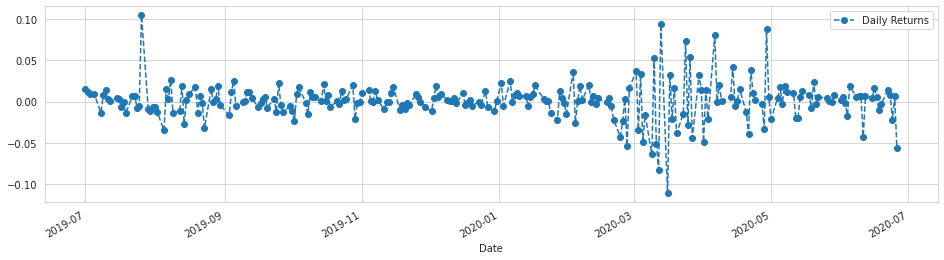

In [ ]:
#Plot daily return %
GOOG['Daily Returns'].plot(legend = True, figsize = (16,4), linestyle = '--',marker = 'o')

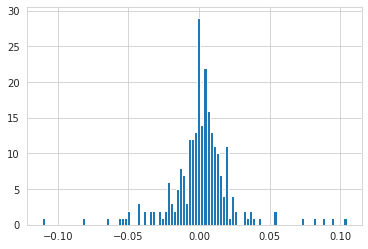

In [ ]:
#Plot daily return % using Histogram
GOOG['Daily Returns'].hist(bins = 100)

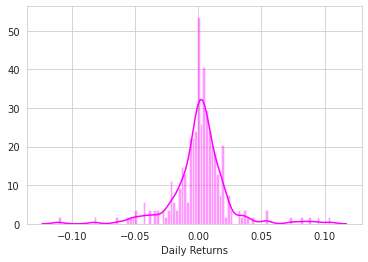

In [ ]:
sns.distplot(GOOG['Daily Returns'].dropna(), bins=100, color='magenta')

In [ ]:
#To compare the daily Returns on all the stocks in our list
#Create a df with 'Closing' value of all the stocks in our list
closingstock_df = DataReader(companies_list,'yahoo',start,end)['Close']

In [ ]:
#Let's see the df
closingstock_df.head()

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2019-06-28,193.000000,1893.630005,197.919998,367.320007,1080.910034
2019-07-01,193.000000,1922.189941,201.550003,374.600006,1097.949951
2019-07-02,195.000000,1934.310059,202.729996,375.429993,1111.250000
2019-07-03,197.199997,1939.000000,204.410004,381.720001,1121.579956
2019-07-05,196.399994,1942.910034,204.229996,380.549988,1131.589966


In [ ]:
companies_return = closingstock_df.pct_change()

In [ ]:
companies_return.head(10)

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2019-06-28,NaN,NaN,NaN,NaN,NaN
2019-07-01,0.000000,0.015082,0.018341,0.019819,0.015764
2019-07-02,0.010363,0.006305,0.005855,0.002216,0.012114
2019-07-03,0.011282,0.002425,0.008287,0.016754,0.009296
2019-07-05,-0.004057,0.002017,-0.000881,-0.003065,0.008925
2019-07-08,-0.003259,0.004843,-0.020614,-0.011536,-0.013468
2019-07-09,0.017624,0.018429,0.006099,0.010022,0.007596
2019-07-10,0.017670,0.014641,0.009889,0.002816,0.013913
2019-07-11,-0.007399,-0.008100,-0.007282,-0.003937,0.003271


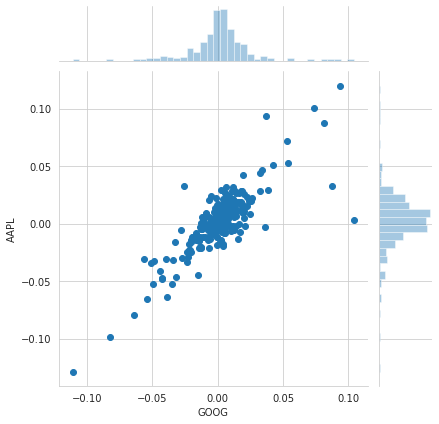

In [ ]:
#Let's Compare the Daily Returns on GOOG vs AAPL
#a) Using Scatter Plot
sns.jointplot(companies_return['GOOG'], companies_return['AAPL'] )

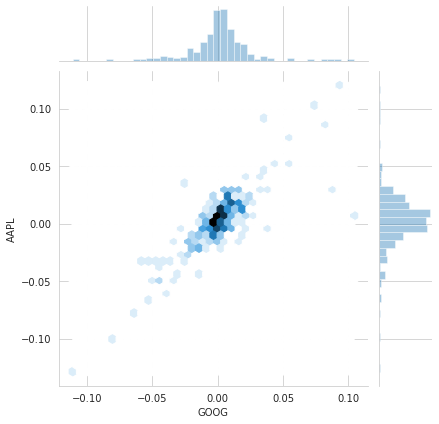

In [ ]:
sns.jointplot(companies_return['GOOG'],companies_return['AAPL'], kind = 'hex')
# Using hex plot

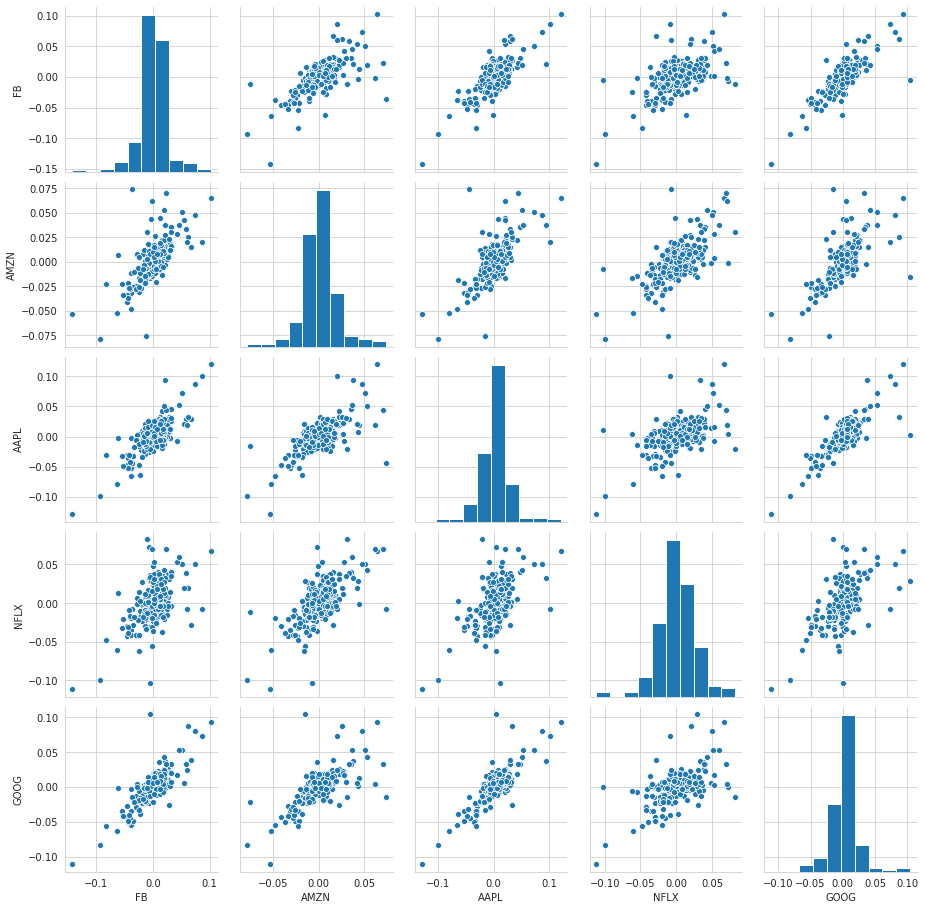

In [ ]:
# Compare all stocks in the companies_list based on daily_returns
sns.pairplot(companies_return)

**Using PairGrid class,**
It's real use is when we need custom functions to map different information onto the plot. For Example [Pearson Correlation Coefficient](https://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/)

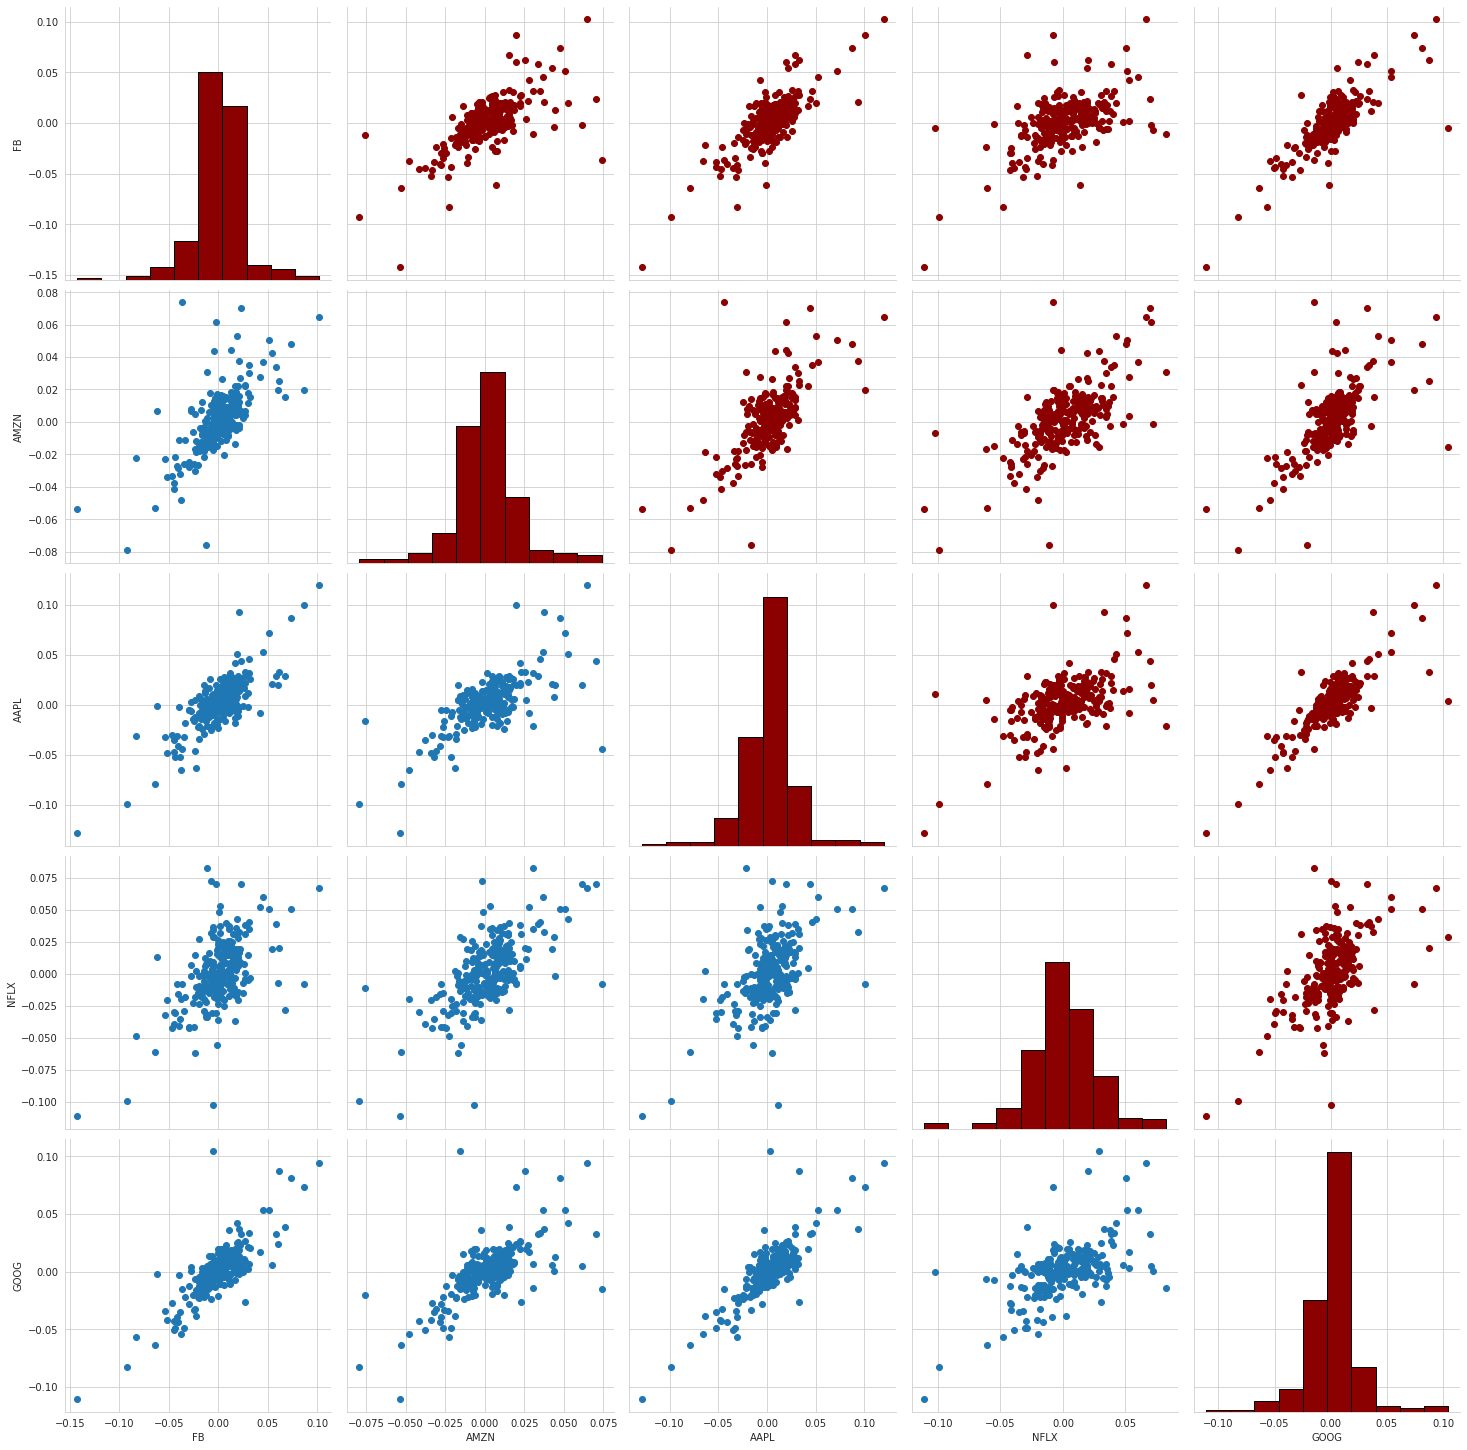

In [ ]:
#Use PairGrid for Customization of daily_returns
grid = sns.PairGrid(data = companies_return,height = 4)
# map a scatter plot to upper triangle
grid.map_upper(plt.scatter, color = 'darkred')
#Map a histogram to the diagonal
grid.map_diag(plt.hist, bins = 10, color = 'darkred', edgecolor = 'k')
#Map a density plot to lower traingle
grid.map_lower(plt.scatter, cmap = 'Reds' )


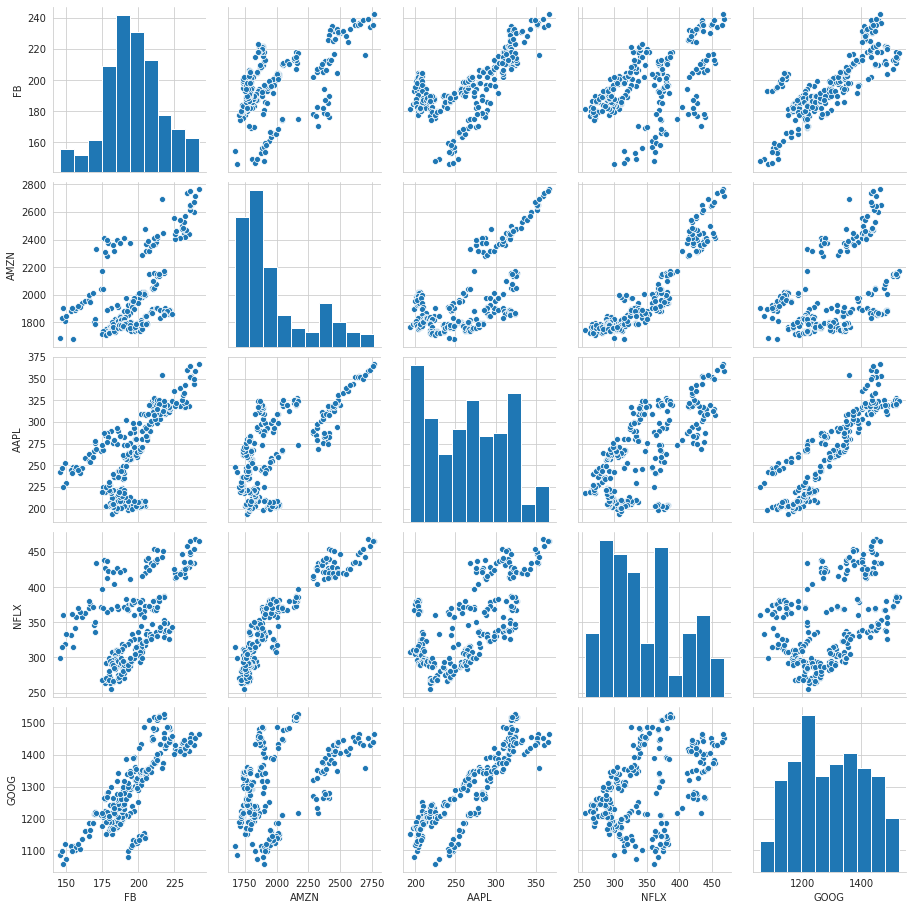

In [ ]:
# Compare all stocks in the companies_list based on closing value
sns.pairplot(closingstock_df )

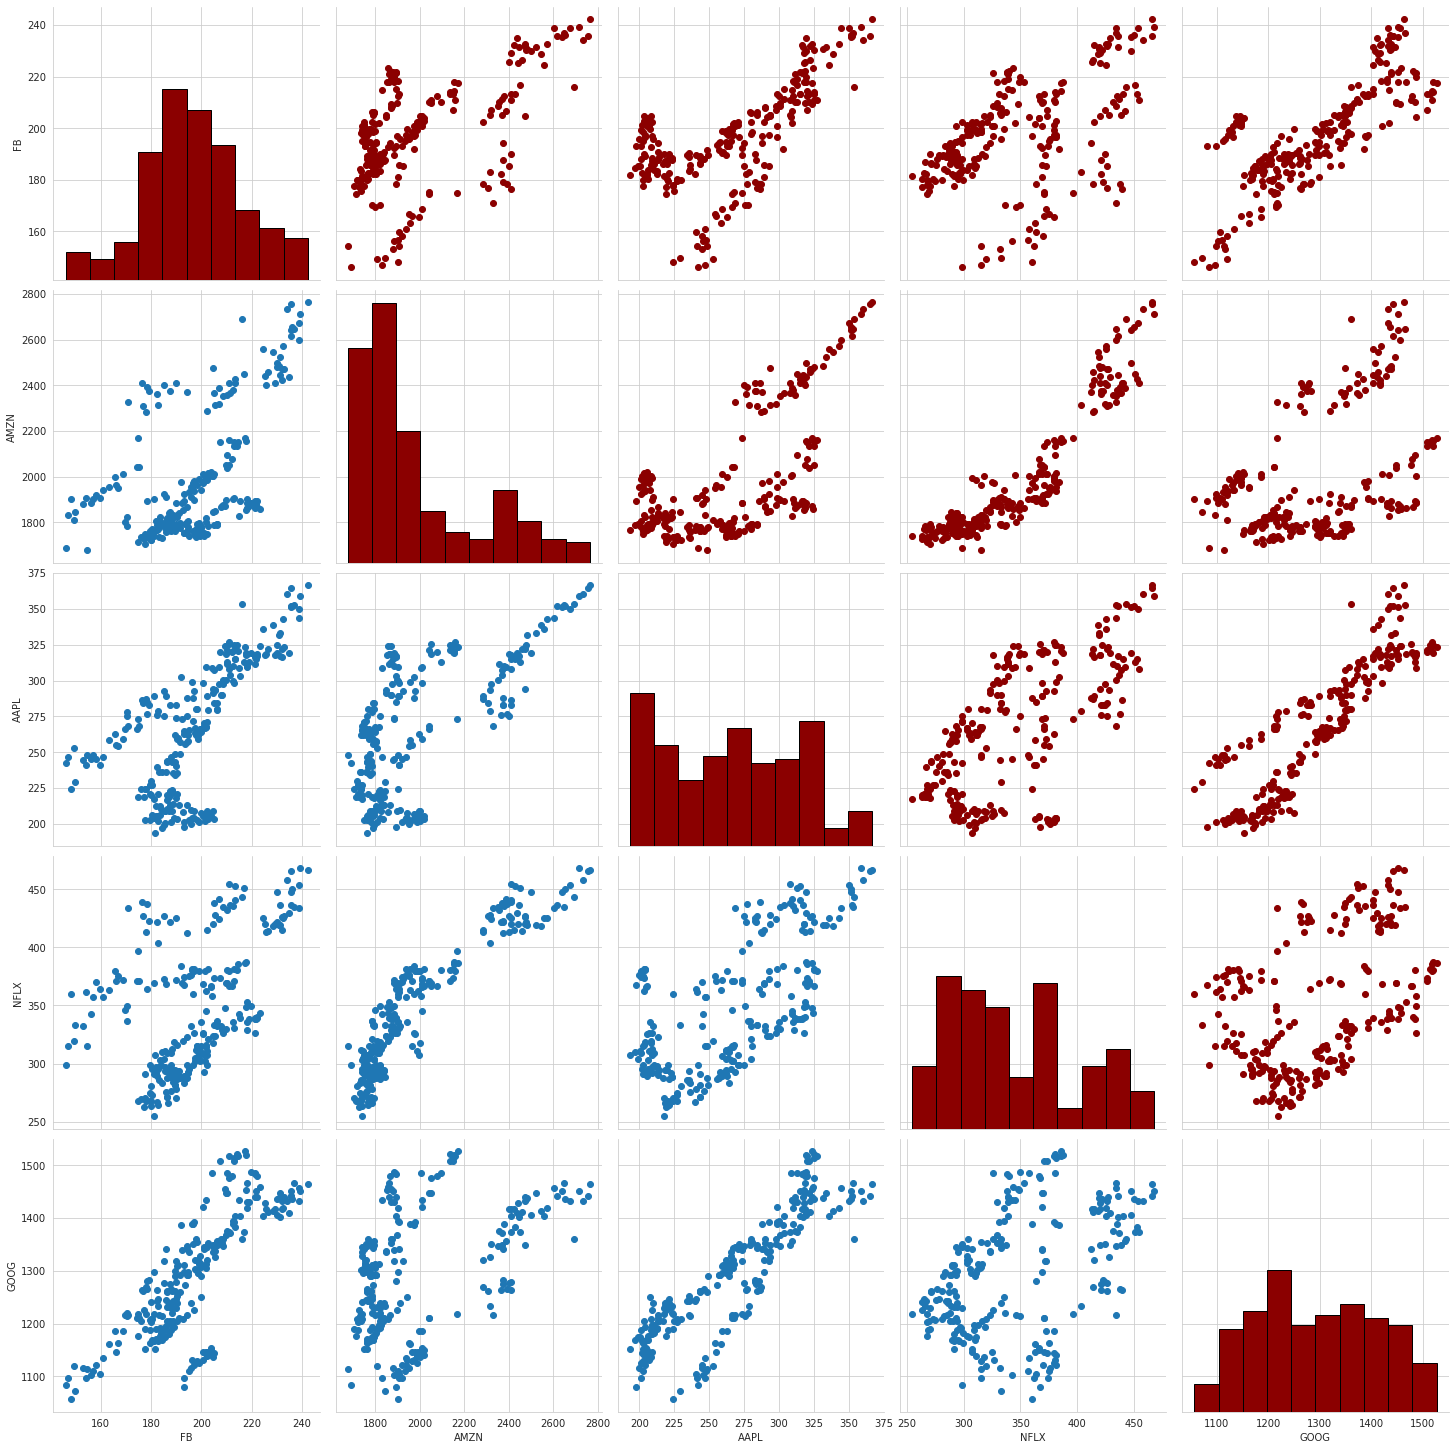

In [ ]:
#Use PairGrid for Customization of closing price
grid = sns.PairGrid(data = closingstock_df,height = 4)
# map a scatter plot to upper triangle
grid.map_upper(plt.scatter, color = 'darkred')
#Map a histogram to the diagonal
grid.map_diag(plt.hist, bins = 10, color = 'darkred', edgecolor = 'k')
#Map a density plot to lower traingle
grid.map_lower(plt.scatter, cmap = 'Reds' )


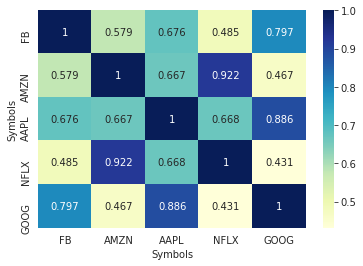

In [ ]:
#Use Heatmap to view co-relation for closing price
sns.heatmap(closingstock_df.corr(), annot=True,fmt=".3g", cmap='YlGnBu')
# We can see from below figure the most corelation is b/w AMZN and NFLX

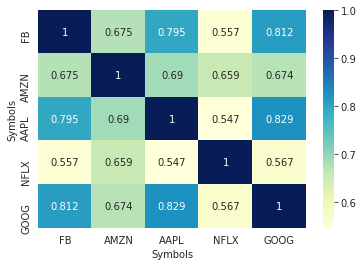

In [ ]:
# Use HeatMap to view co-relation for daily returns
sns.heatmap(companies_return.corr(),annot = True, fmt = '.3g', cmap = 'YlGnBu')
# From below figure, we can see the most co-relation is again b/w GOOG and AAPL

#Section 3 Risk Analysis

In [ ]:
# Define a new df by dropping null values for companies_return
rets = companies_return.dropna()
rets.head()

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2019-07-01,0.000000,0.015082,0.018341,0.019819,0.015764
2019-07-02,0.010363,0.006305,0.005855,0.002216,0.012114
2019-07-03,0.011282,0.002425,0.008287,0.016754,0.009296
2019-07-05,-0.004057,0.002017,-0.000881,-0.003065,0.008925
2019-07-08,-0.003259,0.004843,-0.020614,-0.011536,-0.013468


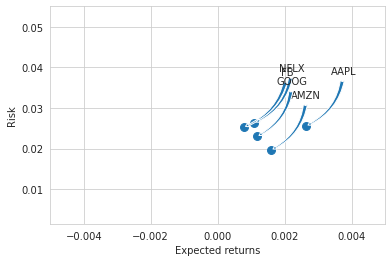

In [ ]:
#There are many methods for Risk Analysis
#One is to compare daily returns expected(mean) with std deviation
# Defining the area for the circles of scatter plot to avoid tiny little points
area = np.pi*20
plt.scatter(rets.mean(),rets.std(),s = area)
#set x,y limits of the plot
plt.xlim([-0.005,0.005])
plt.ylim([0.0015,0.055])
#Set the label
plt.xlabel('Expected returns')
plt.ylabel('Risk')
# Label the scatter plots, for more info
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = 'fancy', connectionstyle = 'arc3,rad=-0.3'))

Value at risk using the ["bootstrap"](https://) method

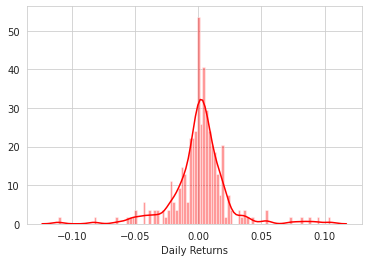

In [ ]:
sns.distplot(GOOG['Daily Returns'], bins = 100, color = 'red')

In [ ]:
GOOG['Daily Returns'].describe()

count    251.000000
mean       0.001179
std        0.023008
min       -0.111008
25%       -0.006261
50%        0.001918
75%        0.010134
max        0.104485
Name: Daily Returns, dtype: float64

In [ ]:
# The 0.05 empirical quantile of daily returns
# a) For GOOG
companies_return['GOOG'].quantile(0.5)

0.0019177068546034626

In [ ]:
# b) For 'FB'
companies_return["FB"].quantile(0.5)

0.0018007787037166434

In [ ]:
# c) For 'AMZN'
companies_return["AMZN"].quantile(0.5)

0.0024227334654489674

In [ ]:
# d) For 'AAPL'
companies_return["AAPL"].quantile(0.5)

0.003569526034268966

In [ ]:
# e) For 'NFLX'
companies_return["NFLX"].quantile(0.5)

9.914657292764417e-05

#VaR using Monte Carlo Simulation
A Monte Carlo simulation is an attempt to predict the future many times over with different market conditions. 
At the end of the simulation, thousands or millions of "random trials" produce a distribution which can be aggregated to predict how risky a stock is.

We will use the Geometric Brownian Motion (GBM), which is technically a Markov process. This means the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH)—past price information is already incorporated, and the next price movement is "conditionally independent" of past price movements.

This means you can't predict the "Future Stock Price" solely based on "Past Stock Price"

The change in stock price is the stock price multiplied by the two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each time period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.

For more details please see this [link](https://www.investopedia.com/articles/07/montecarlo.asp)
​

In [ ]:
#Set up the time horizon
days = 365
#change interval
dt = 1/days
#get mu for calculating 'drift' for 'GOOG' stock
mu = rets.mean()['GOOG']
#get sigma for calculating 'shock' for 'GOOG' stock
sigma = rets.std()['GOOG']


Next, we will create a function that takes in the 'starting price' and 'number of days', 'sigma' and 'mu' we already calculated form our daily returns and returns simulated price array



In [ ]:
def monte_carlo_simulation(starting_price, days, mu, sigma):
  #define a price array
  price = np.zeros(days)
  price[0] = starting_price
  #shock n dripft
  shock = np.zeros(days)
  drift = np.zeros(days)

  #Running price for no of days
  for i in range(1,days):
    #Calculating shock
    shock[i] = np.random.normal(loc = mu*dt, scale = sigma*np.sqrt(dt))
    #Calculating drift
    drift[i] = mu*dt
    #Caculating price
    price[i]=price[i-1]+(price[i-1]*(drift[i]+shock[i]))
  return price


Applying Monte Caro Simulation for Various stocks

In [ ]:
#For GOOG stock
GOOG.head()


,High,Low,Open,Close,Volume,Adj Close,SMA for 10 days,SMA for 20 days,SMA for 50 days,SMA for 100 days,Daily Returns
Date,,,,,,,,,,,
2019-06-28,1081.000000,1073.369995,1076.390015,1080.910034,1693200,1080.910034,NaN,NaN,NaN,NaN,NaN
2019-07-01,1107.579956,1093.703003,1098.000000,1097.949951,1436300,1097.949951,NaN,NaN,NaN,NaN,0.015764
2019-07-02,1111.770020,1098.170044,1102.239990,1111.250000,991600,1111.250000,NaN,NaN,NaN,NaN,0.012114
2019-07-03,1126.760010,1113.859985,1117.410034,1121.579956,767000,1121.579956,NaN,NaN,NaN,NaN,0.009296
2019-07-05,1132.880005,1116.140015,1117.800049,1131.589966,1264300,1131.589966,NaN,NaN,NaN,NaN,0.008925


Text(0.5, 1.0, 'Monte Carlo Simulation for GOOG')

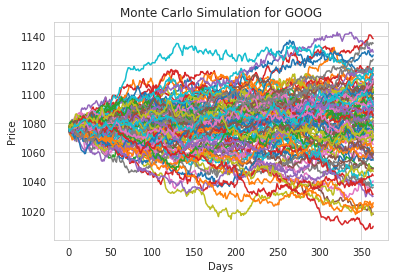

In [ ]:
start_price = GOOG['Open'][0]
for run in range(100):
  plt.plot(monte_carlo_simulation(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Monte Carlo Simulation for GOOG")

In [ ]:
#For AMZN stock
mu = rets.mean()['AMZN']
sigma = rets.std()['AMZN']
AMZN.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-06-28,1912.939941,1884.000000,1909.099976,1893.630005,3037400,1893.630005
2019-07-01,1929.819946,1914.660034,1922.979980,1922.189941,3203300,1922.189941
2019-07-02,1934.790039,1906.630005,1919.380005,1934.310059,2645900,1934.310059
2019-07-03,1941.589966,1930.500000,1935.890015,1939.000000,1690300,1939.000000
2019-07-05,1945.900024,1925.300049,1928.599976,1942.910034,2628400,1942.910034


Text(0.5, 1.0, 'Monte Carlo Simulation for AMZN')

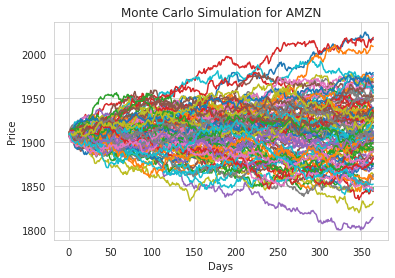

In [ ]:
start_price = AMZN['Open'][0]
for run in range(100):
  plt.plot(monte_carlo_simulation(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Monte Carlo Simulation for AMZN")

In [ ]:
#For FB
mu = rets.mean()['FB']
sigma = rets.std()['FB']
FB.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-06-28,193.199997,189.940002,190.550003,193.000000,16378900,193.000000
2019-07-01,195.279999,191.929993,195.210007,193.000000,14204700,193.000000
2019-07-02,195.000000,192.710007,193.000000,195.000000,9050000,195.000000
2019-07-03,197.399994,194.160004,194.160004,197.199997,10246100,197.199997
2019-07-05,197.070007,194.169998,196.179993,196.399994,11164100,196.399994


Text(0.5, 1.0, 'Monte Carlo Simulation for FB')

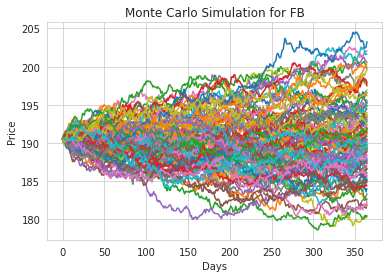

In [ ]:
start_price = FB['Open'][0]
for run in range(100):
  plt.plot(monte_carlo_simulation(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Monte Carlo Simulation for FB")

In [ ]:
#For AAPL
mu = rets.mean()['AAPL']
sigma = rets.std()['AAPL']
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-06-28,199.500000,197.050003,198.679993,197.919998,31110600.0,195.585770
2019-07-01,204.490005,200.649994,203.169998,201.550003,27316700.0,199.172989
2019-07-02,203.130005,201.360001,201.410004,202.729996,16935200.0,200.339050
2019-07-03,204.440002,202.690002,203.279999,204.410004,11362000.0,201.999237
2019-07-05,205.080002,202.899994,203.350006,204.229996,17265500.0,201.821350


Text(0.5, 1.0, 'Monte Carlo Simulation for AAPL')

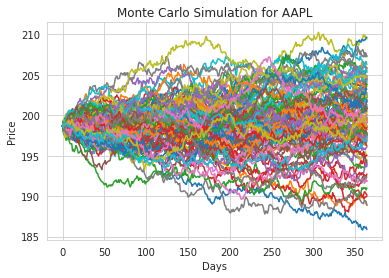

In [ ]:
start_price = AAPL['Open'][0]
for run in range(100):
  plt.plot(monte_carlo_simulation(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Monte Carlo Simulation for AAPL")

In [ ]:
#For NFLX
mu = rets.mean()['NFLX']
sigma = rets.std()['NFLX']
NFLX.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-06-28,371.540009,364.869995,370.260010,367.320007,4592700,367.320007
2019-07-01,376.660004,372.000000,373.500000,374.600006,4992600,374.600006
2019-07-02,376.000000,370.309998,374.890015,375.429993,3625000,375.429993
2019-07-03,381.989990,375.839996,376.690002,381.720001,3799000,381.720001
2019-07-05,381.399994,375.559998,378.290009,380.549988,3732200,380.549988


Text(0.5, 1.0, 'Monte Carlo Simulation for NFLX')

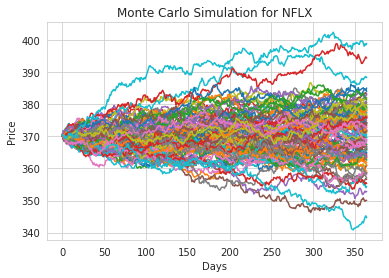

In [ ]:
start_price = NFLX['Open'][0]
for run in range(100):
  plt.plot(monte_carlo_simulation(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Monte Carlo Simulation for NFLX")


Let's get a histogram of the end results for a much larger run. 

In [ ]:
#Let's pick our favorite :) GOOG stock
start_price=GOOG['Open'][0]
#Set a large value for runs
runs = 100000
# Create an empty array to hold the end price data
simulations = np.zeros(runs)
#get mu for calculating 'drift' for 'GOOG' stock
mu = rets.mean()['GOOG']
#get sigma for calculating 'shock' for 'GOOG' stock
sigma = rets.std()['GOOG']
for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = monte_carlo_simulation(start_price,days,mu,sigma)[days-1]


Now that we have our array of simulations, we can go ahead and plot a histogram ,as well as use qunatile to define our risk for this stock.

For more info on quantiles, check out this [link](https://en.wikipedia.org/wiki/Quantile)

Text(0.5, 1.0, 'Final price distribution for Google Stock(GOOG) after 365 days')

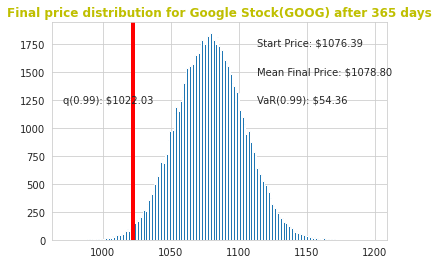

In [ ]:

# Let's define q as the 1% empirical quantile  meaning 99% of the values should fall between here
q = np.percentile(simulations,1)

# Plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title(label="Final price distribution for Google Stock(GOOG) after %s days" % days, weight='bold', color='Y')

VaR for GOOG stock is \$54.36 for every \$1076.39(initial price) invested

**Which means for every GOOG stock you purchase at \$1076.39 initial price, you are putting approximately \$54.36 at risk 99% of the time according to our monte Carlo Simulation**

In [ ]:
!python -m pip --version

pip 19.3.1 from /usr/local/lib/python3.6/dist-packages/pip (python 3.6)


In [ ]:
!𝚙𝚒𝚙 𝚒𝚗𝚜𝚝𝚊𝚕𝚕 𝚓𝚞𝚙𝚢𝚝𝚎𝚛-𝚝𝚘-𝚖𝚎𝚍𝚒𝚞𝚖

/bin/bash: 𝚙𝚒𝚙: command not found
